   # <font color='steelblue' size=6px> Primjena BFS i DFS algoritma za rješavanje labirinta </font>

<br>

**Kratki uvod:** Ideja ovog eseja je proučiti BFS i DFS algoritme pretraživanja prostora stanja. Pogledat ćemo  njihovu implementaciju, primjer izvođenja na grafu te konkretnu primjenu na problemu rješavanja labirinta. 
<br>

**Sadržaj:**
* 1.[Uvod - Općenito o grafovima](#uvod)
* 2.[Pretraživanje prostora stanja](#pps)
    * 2.1 [BFS](#bfs)
    * 2.2 [DFS](#dfs)
* 3.[Primjena BFS i DFS](#labirint)
* 4.[Zaključak](#kraj)
* 5.[Literatura](#lit)


## <font color='steelblue' size=5px> 1. Općenito o grafovima <a name="uvod"></a> </font>


**Def:** <i>**Jednostavan graf G** sastoji se od nepraznog konačnog skupa skupa V čije
elemente zovemo **vrhovi** i konačnog skupa E različitih parova elemenata V koje
zovemo **bridovi**.</i>

Smatramo da je graf zadan ako su zadani njegovi skupovi vrhova i bridova. Označavamo ga s **G(V,E)**.

**Oznake:**
* U teoremima i definicijama vrhove obično označavamo malim slovima  *u,v*, a bridove slovima *e,f*. 
* Brid između vrhova *u* i *v* označavamo sa *e={u,v}* ili *e=uv*. 
* U grafovima vrhove označavamo velikim tiskanim slovima A,B,C, ...
<br><br>

**Def:** <i>Za vrhove u i v kažemo da su ***susjedni*** ako postoji brid *e=uv* u tom grafu koji
ih spaja. Za bridove e i f kažemo da su susjedni ako postoji vrh u u tom grafu koji je njima
zajednički.</i> 
<br><br>


In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from collections import deque

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
plt.rcParams['figure.max_open_warning'] = 200

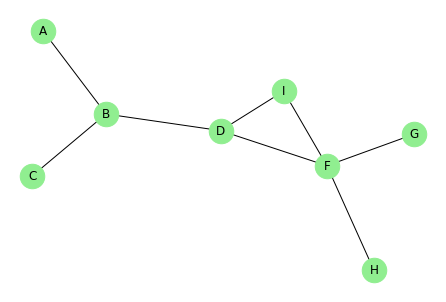

In [131]:
df = pd.DataFrame({'source': ['A', 'B','B','D','F','F','D','I'],
                   'target': ['B','C','D','F','G','H','I','F']})
g1 = nx.Graph()
g1 = nx.from_pandas_edgelist(df)
nx.draw(g1, with_labels=True, node_color="lightgreen", node_shape='o', node_size=600)
plt.show()

     Slika 1. Primjer grafa

**Def:** <i>**Put u grafu G** je konačan slijed bridova v1v2,v2v3,…,vn-1vn u kojem su svaka
dva brida susjedna i svi su vrhovi različiti, osim eventualno početni i krajnji. Put možemo
označavati i kao v1 → v2 → v3 → ... → vn.</i>

**Def:** <i>Za graf G kažemo da je **povezan** onda i samo onda ako postoji put između
svaka dva vrha.</i>
<br><br>

Na slici 1. vidimo primjer povezanog grafa, a u donjem primjeru ćemo vidjeti primjer nepovezanog.

In [3]:
g1.remove_node('D')
g1.nodes() #ispisuje nam sve vrhove u grafu 

NodeView(('A', 'B', 'C', 'F', 'G', 'H', 'I'))

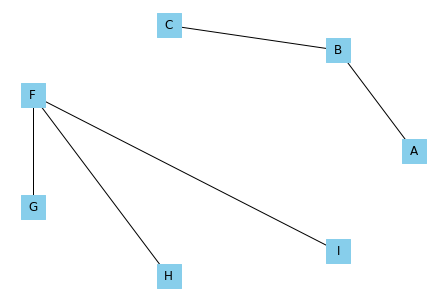

In [121]:
nx.draw_shell(g1, with_labels=True, node_color="skyblue", node_shape='s', node_size=600)
plt.show()

    Slika 2. Primjer nepovezanog grafa

**Def:** *Kažemo da je graf **potpuno povezan** ako su svaka dva vrha u grafu povezana točno jednim bridom.*

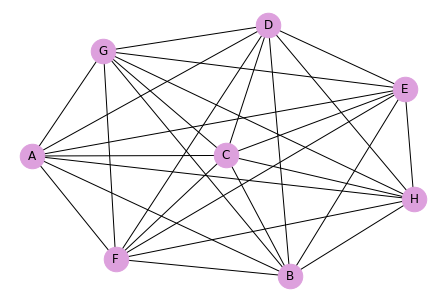

In [5]:
g2=nx.Graph()
nodes2=np.array(['A','B','C','D','E','F','G','H'])
n=nodes2.size
for i in range(0,n,1):
    g2.add_node(nodes2[i])
    
g2=nx.complete_graph(g2.nodes())

nx.draw(g2, with_labels=True, node_size=600, node_shape='o', node_color="plum")

    Slika 3. Primjer potpuno povezanog grafa

**Def:** <i>**Usmjereni graf** ili **digraf** je graf koji ima usmjerene bridove odnosno svakom bridu je pridružen njegov **početni** i **završni** vrh.</i>


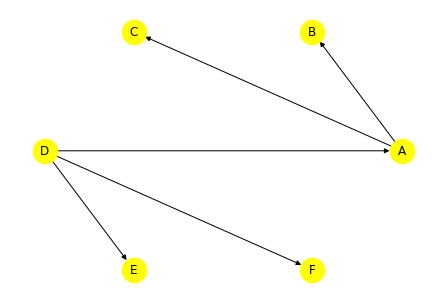

In [130]:
g3=nx.DiGraph()
g3.add_edge('A','B')
g3.add_edge('A','C')
g3.add_edge('D','A')
g3.add_edge('D','E')
g3.add_edge('D','F')
nx.draw_shell(g3, with_labels=True, node_size=600, node_shape='o', node_color="yellow")

    Slika 4. Primjer usmjerenog grafa

Pretraživanje prostora stanja odnosi se na pretraživanje usmjerenog grafa.

## <font color='steelblue' size=5px>2. Pretraživanje prostora stanja <a name="pps"></a></font>

**Vrste pretraživanja:**
* Slijepo pretraživanje:
    * Pretraživanje u širinu (BFS)
    * Pretraživanje u dubinu (DFS)
    * Pretraživanje s jednolikom cijenom
    * Ograničeno pretraživanje u dubinu
    * Dvosmjerno pretraživanje
* Usmjereno pretraživanje:
    * A*
    * 

U nastavku ćemo se baviti samo proučavanjem BFS i DFS algoritama.

### <font color='steelblue' size=5px> 2.1. BFS <a name="bfs"></a> </font>

Pretraživanje u širinu ili BFS (BreadFirstSearch)

In [175]:
graph1 = {'A': ['B', 'C','E'],
          'B': ['A'],
          'C': ['D'],
          'D': ['C', 'E'],
          'E': ['F','D'],
          'F': ['C'],
          'G': []}

Pomoćne funkcije:

In [86]:
def isDefined(Dict, Key):
    for k in Dict:
        if k==Key:
            return True
    return False

def find_path_bfs(Dict, last):
    
    if(isDefined(Dict, last)):
        prev = Dict[last]
        path=list()
        path.append(last)

        while(prev!=0):
            path.append(prev)
            prev=Dict[prev]

        path.reverse()
        return path
    else:
        return

In [176]:
def BFS(graph,first,last):
    
    global br_bfs
    br_bfs = 0
    visited_bfs = list()
    
    q=deque()
    q.append(first)
    
    prev = dict()
    prev[first]=0

    while q:
        node = q.popleft()
        if not(node in visited_bfs):
            br_bfs+=1
            visited_bfs.append(node)
            if(node==last):
                break
            
            for neighbor in graph[node]:
                q.append(neighbor)
                if not isDefined(prev, neighbor):
                    prev[neighbor] = node
                
            
    path=find_path_bfs(prev, last)
    if not(path):
        print("Rješenje ne postoji.")
        
    return path,visited_bfs
    

In [177]:
for node in graph1:
    graph1[node].sort

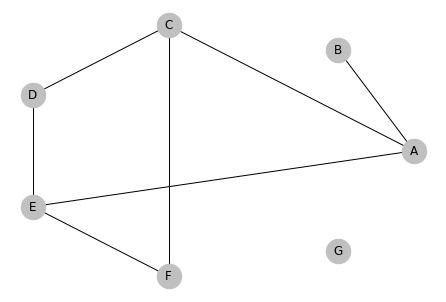

In [181]:
G = nx.Graph()
G.add_nodes_from(graph1.keys())
for key, value in graph1.items():
    G.add_edges_from([(key, t) for t in value])
nx.draw_circular(G, with_labels=True, node_size=600, node_style='o', node_color='silver')
plt.show()

    Slika 5. Graf G

**Primjer 1:** Želimo pomoću BFS algoritma naći put od čvora A do čvora D.

In [188]:
put1, posjeceni1 = BFS(graph1, 'A','D')
print(f'Put od čvora A do čvora D je : {put1}')
print(f'Popis čvorova koji su posjećeni tijekom traženja puta: {posjeceni1}')

Put od čvora A do čvora D je : ['A', 'C', 'D']
Popis čvorova koji su posjećeni tijekom traženja puta: ['A', 'B', 'C', 'E', 'D']


Dodajemo čvorovima boje kako bi ih mogli drugačije obojati na grafu.

In [190]:
colormap = dict()
for node in graph1:
    if (put1):
        if node in put1:
            colormap[node] = 'greenyellow'
        else:
            colormap[node] = 'silver'
    else:
        colormap[node] = 'silver'

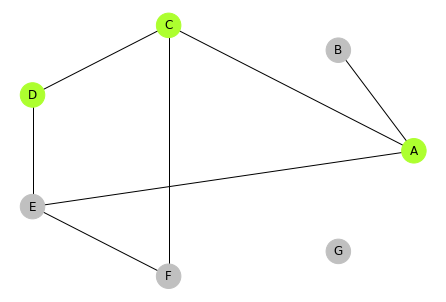

In [191]:
clrs = [colormap.get(node) for node in G.nodes()]
nx.draw_circular(G, with_labels=True, node_color=clrs, node_style = 'O', node_size=600)

    Slika 6. Graf G nakon poziva BFS(G, 'A', 'D') 
             Zeleni čvorovi predstavljaju pronađeni put od A do D

**Primjer 2:** Želimo pronaći put od A do G. 

In [192]:
put2, posjeceni2 = BFS(graph1, 'A','G')

Rješenje ne postoji.


### <font color='steelblue' size=5px>2.2. DFS <a name="dfs"></a></font>

In [12]:
def DFS (graph, first, last): #graph je u dict obliku
    
    global br_dfs
    br_dfs = 0
    visited_dfs = list()
    
    stack = deque()
    stack.append(first)
    
    prev=dict()
    prev[first]=0
    
    while stack:
        node = stack.pop()
        
        if not (node in visited_dfs):
            br_dfs+=1
            visited_dfs.append(node)
            if(node == last):
                break
            
            for neighbor in graph[node]:
                stack.append(neighbor)
                prev[neighbor]=node
                
    
    print (f'Broj posjecenih: {br_dfs} \nLista posjecenih: {visited_dfs}')
    print (prev)

In [13]:
for node in graph:
    graph[node].sort(reverse=True)
graph

{'A': ['E', 'C', 'B'],
 'B': ['A'],
 'C': ['D'],
 'D': ['E', 'C'],
 'E': ['F', 'D'],
 'F': ['C'],
 'G': []}

In [14]:
DFS(graph, 'A', 'D')

Broj posjecenih: 4 
Lista posjecenih: ['A', 'B', 'C', 'D']
{'A': 'B', 'E': 'A', 'C': 'A', 'B': 'A', 'D': 'C'}


## <font color='steelblue' size=5px>3. Primjena BFS i DFS <a name="labirint"></a>

Pogledat ćemo primjernu BFS i DFS algoritma na labirintima različitih veličina i oblika (odnosi se na položaj zapreka). Radi jednostavnosti, promatrat ćemo samo kvadratne (*nxn*) labirinte. Na taj način ćemo vidjeti prije navedene karakteristike algoritama na stvarnim primjerima. Na kraju ćemo usporediti rezultate algoritama na svakom labirintu u smislu broja čvorova koje posjeti. 

In [26]:
def maze():
    maze=[]
    maze.append(['#','#','S','#','#','#','#','#','#','#','#','#','#','#'])
    maze.append(['#',' ',' ','#','#',' ',' ','#','#',' ',' ','#',' ','#'])
    maze.append(['#','#',' ',' ',' ',' ',' ',' ',' ','#','#','#',' ','#'])
    maze.append(['#',' ',' ','#','#','#',' ','#',' ',' ','#','#',' ','#'])
    maze.append(['#','#',' ',' ',' ','#','#','#','#',' ',' ','#','#','#'])
    maze.append(['#',' ',' ','#','#',' ','#','#','#',' ',' ',' ','#','#'])
    maze.append(['#',' ',' ',' ','#',' ','#',' ',' ','#',' ',' ','#','#'])
    maze.append(['#','#','#',' ',' ',' ','#','#','#',' ',' ',' ',' ','#'])
    maze.append(['#',' ',' ','#','#',' ',' ',' ','#',' ',' ','#',' ','#'])
    maze.append(['#','#',' ',' ','#','#',' ','#',' ',' ','#','#',' ','#'])
    maze.append(['#',' ',' ','#',' ','#',' ','#',' ',' ','#',' ',' ','#'])
    maze.append(['#','#',' ',' ','#','#','#','#','#',' ',' ',' ','#','#'])
    maze.append(['#',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ','#','#','#'])
    maze.append(['#','#','#','#','#','#','#','#','#','#','E','#','#','#'])
    
    return maze

**Funkcija `convert_to_graph`:** <br>
Želimo zadani labirint pretvoriti u graf. <br>Prazna polja u labirintu smatrat ćemo vrhovima grafa kojeg stvaramo i kanije pretražujemo. Polja koja su zauzeta (prepreke) ne ubacujemo u graf. <br>
Broj čvora smo odredili pomoću varijable pos koju povećavamo u svakom koraku kad se pomaknemo za jedno polje dalje u listi.
<br>`pozicija (i , j) = ( pos%n, floor(pos/n))` 

In [16]:
def convert_to_graph(maze):
    
    graph = dict()
    neighbor=[] #lista susjeda
    n=len(maze)
    pos=-1 
    
    for i in range (0,n,1):
        for j in range(0,n,1):
            neighbor=[]
            pos+=1
            if(maze[i][j]!='#'):
                if(i+1<n and maze[i+1][j]!='#'):
                    down = pos+n
                    neighbor.append(down) #dozvoljen je pomak desno
                if(i-1>=0 and maze[i-1][j]!='#'):
                    up = pos-n
                    neighbor.append(up)
                if(j+1<n and maze[i][j+1]!='#'):
                    right = pos+1
                    neighbor.append(right)
                if(j-1>=0 and maze[i][j-1]!='#'):
                    left = pos-1
                    neighbor.append(left)
                graph[pos]=neighbor
    
    #print (graph)
    return graph
    
## MOZDA BI TREBALO SORTIRATI ? ? ---Prije pozivanja BFS i DFS ovisno koji pozivamo
## BFS treba sort, a DFS sort(reverse=True)

**Primjer:**
Pretpostavimo da imamo labirint 3x3 koji izgleda ovako:

<table>
    <tr><td>#</td><td> </td><td> </td></tr>
    <tr><td>#</td><td> </td><td>#</td></tr>
    <tr><td> </td><td> </td><td>#</td></tr>
</table> <br>

Zapreke (#) su na poljima (0,0), (1,0), (1,2) i (2,2). Sva ostala polja tog labirinta su slobodna i želimo ih dodati u graf koji ćemo pretraživati. Prema gore opisanom načinu za određivanje broja čvora dobijemo sljedeću tablicu: 

<table>
    <tr><td>0</td><td>1</td><td>2</td></tr>
    <tr><td>3</td><td>4</td><td>5</td></tr>
    <tr><td>6</td><td>7</td><td>8</td></tr>
</table>

Iz ovog prikaza vidimo da ćemo u grafu imati čvorove označene sa *`1,2,4,6,7`* . <br>
Graf spremamo u dictionary oblika `čvor: [susjedi]` <br>

In [81]:
labirint = []
labirint.append(['#',' ',' '])
labirint.append(['#',' ','#'])
labirint.append([' ',' ','#'])

graph = convert_to_graph(labirint)
for node in graph:
    print(f'{node}: {graph[node]}')


1: [4, 2]
2: [1]
4: [7, 1]
6: [7]
7: [4, 6]


1: [4,2] --> čvor 1 ima susjede 4 i 2

 <br>
 
 Iduća funkcija koju ćemo koristiti je funkcija **`draw`** koja crta labirint.
 Labirint je prikazan na sljedeći način:
 * <font color='black'> **crna polja** </font> -> zapreke
 * <font color='silver'> **bijela polja** </font> -> prazna polja
 * <font color='firebrick'> **crvena polja** </font> -> sva posjećena polja
 * <font color='mediumseagreen'> **zelena polja** </font> -> put do cilja
 * <font color='gold'> **žuta polja** </font> -> početna (S) i završna (E) točka


In [75]:
def draw(maze,path,visited):

    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_facecolor('white')
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)

    rects_o=[]
    rects_e=[]
    rects_p=[]
    rects_v=[]
    rects_s=[]

    colors=np.arange(10000)
    for i in range(0,10000,1):
        colors[i]=0
    k=0
    size=len(maze)
    for i in range (0,size,1):
        for j in range(0,size,1):
            if(maze[i][j]=='#'):
                rectangle = Rectangle([j,size-i-1], 1, 1, antialiased = True)
                rects_o.append(rectangle)
                
            elif(maze[i][j]=='S' or maze[i][j]=='E'):
                rectangle = Rectangle([j,size-i-1], 1, 1, antialiased = True)
                rects_s.append(rectangle)
                ax.text(j+1/4, size-i-1+1/4, maze[i][j], fontsize=12)

            elif(k in path):
                rectangle = Rectangle([j,size-i-1], 1, 1, antialiased = True)
                rects_p.append(rectangle) 

            elif((k in visited) and (k not in path)):
                rectangle = Rectangle([j,size-i-1], 1, 1, antialiased = True)
                rects_v.append(rectangle)

            elif(maze[i][j]!='#'): 
                rectangle = Rectangle([j,size-i-1], 1, 1, antialiased = True)
                rects_e.append(rectangle)
            k+=1               

    rect_pcs_o = PatchCollection(rects_o, edgecolor='black', cmap='gray')   #obstacles
    rect_pcs_e = PatchCollection(rects_e, edgecolor='white', cmap='Greys')  #empty fields
    rect_pcs_p = PatchCollection(rects_p, edgecolor='gray', cmap='summer')  #path
    rect_pcs_v = PatchCollection(rects_v, edgecolor='gray', cmap='RdYlBu')  #visited
    rect_pcs_s = PatchCollection(rects_s, edgecolor='gray', cmap='Wistia')  #start and end

    rect_pcs_o.set_array(colors)
    rect_pcs_e.set_array(colors)
    rect_pcs_p.set_array(colors)
    rect_pcs_v.set_array(colors)
    rect_pcs_s.set_array(colors)

    ax.add_collection(rect_pcs_o)
    ax.add_collection(rect_pcs_e)
    ax.add_collection(rect_pcs_p)
    ax.add_collection(rect_pcs_v)
    ax.add_collection(rect_pcs_s)

    ax.plot()   



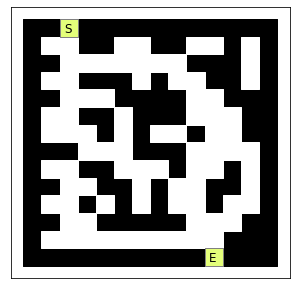

In [76]:
draw(g,[],[])

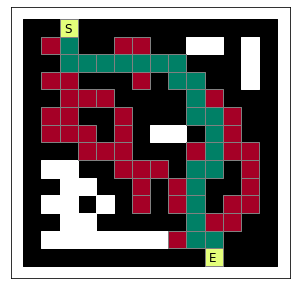

In [78]:
g=maze()
path, visited = BFS(convert_to_graph(g), 2, 192)
draw(g,path,visited)

## <font color='steelblue' size=5px>4. Zaključak <a name="kraj"></a> </font>

## <font color='steelblue' size=5px>5. Literatura: <a name="lit"></a> </font>
* http://degiorgi.math.hr/~singer/ui/ui_1415/UI-2-PretrazivanjeProstoraStanja.pdf 
* https://docs.python.org/3/library/collections.html#collections.deque
* https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.patches.Rectangle.html
* https://networkx.github.io/documentation/networkx-2.4/reference/index.html
* https://networkx.github.io/documentation/stable/reference/drawing.html
* https://web.math.pmf.unizg.hr/nastava/komb/predavanja/predavanja.pdf
* http://www.zemris.fer.hr/predmeti/mr/arhiva/2002-2003/seminari/finished/pdf/grafovi.pdf 


<font color=red>IDEJE:
* <font color=green> dfs </font>
* <font color=green>u bfs dodati globalno polje posjeceni -- RIJESENO- BFS vraca path i visited</font>
* <font color=green>treba nacrtati graf na pocetku i nakraju -- Treba sloziti parametre fje nacrtaj</font>
* osmisliti nacin za generiranje labirinta ili spremiti njih nekoliko na git u ms i povuci ovdje
* dodati tekstove malo

* <font color=green>spomenuti i nacrtati usmjereni graf na pocetku pretrazivanja stanja</font>
* osmisliti nacin za usporediti bfs i dfs
    * mozda napraviti za labirinte razlicitih dimenzija (slucajno generirane ili namjestene) i nacrtati histogram za svaki slucaj (svi stupici na jednom grafu)
    * prosjecna duljina puta ? 
        * ne znam ima li to smisla
 </font>  